# Exploratory plots for the presentation of Week 2

In [75]:
import pandas as pd
import matplotlib.pyplot as plt

In [70]:
data = pd.read_csv('../data/data.csv')

## Different type of shots

In [112]:
data.describe()

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,team_id,shot_id,time_remaining
count,30697.000000,3.069700e+04,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,25697.000000,3.069700e+04,30697.000000,30697.000000
mean,249.190800,2.476407e+07,33.953192,7.110499,91.107535,-118.262690,4.885624,2.519432,0.146562,28.365085,13.437437,0.446161,1.610613e+09,15349.000000,5.358375
std,150.003712,7.755175e+06,0.087791,110.124578,87.791361,0.110125,3.449897,1.153665,0.353674,17.478949,9.374189,0.497103,0.000000e+00,8861.604943,3.469586
min,2.000000,2.000001e+07,33.253300,-250.000000,-44.000000,-118.519800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.610613e+09,1.000000,0.000000
25%,110.000000,2.050008e+07,33.884300,-68.000000,4.000000,-118.337800,2.000000,1.000000,0.000000,13.000000,5.000000,0.000000,1.610613e+09,7675.000000,2.366667
50%,253.000000,2.090035e+07,33.970300,0.000000,74.000000,-118.269800,5.000000,3.000000,0.000000,28.000000,15.000000,0.000000,1.610613e+09,15349.000000,5.066667
75%,368.000000,2.960047e+07,34.040300,95.000000,160.000000,-118.174800,8.000000,3.000000,0.000000,43.000000,21.000000,1.000000,1.610613e+09,23023.000000,8.300000
max,659.000000,4.990009e+07,34.088300,248.000000,791.000000,-118.021800,11.000000,7.000000,1.000000,59.000000,79.000000,1.000000,1.610613e+09,30697.000000,11.900000


In [78]:
# Combine minutes and seconds remaining into decimal minutes remaining, e.g. 6.5 for 6 mins and 30 secs.
data['time_remaining'] = data['minutes_remaining'] + (data['seconds_remaining'] / 60)

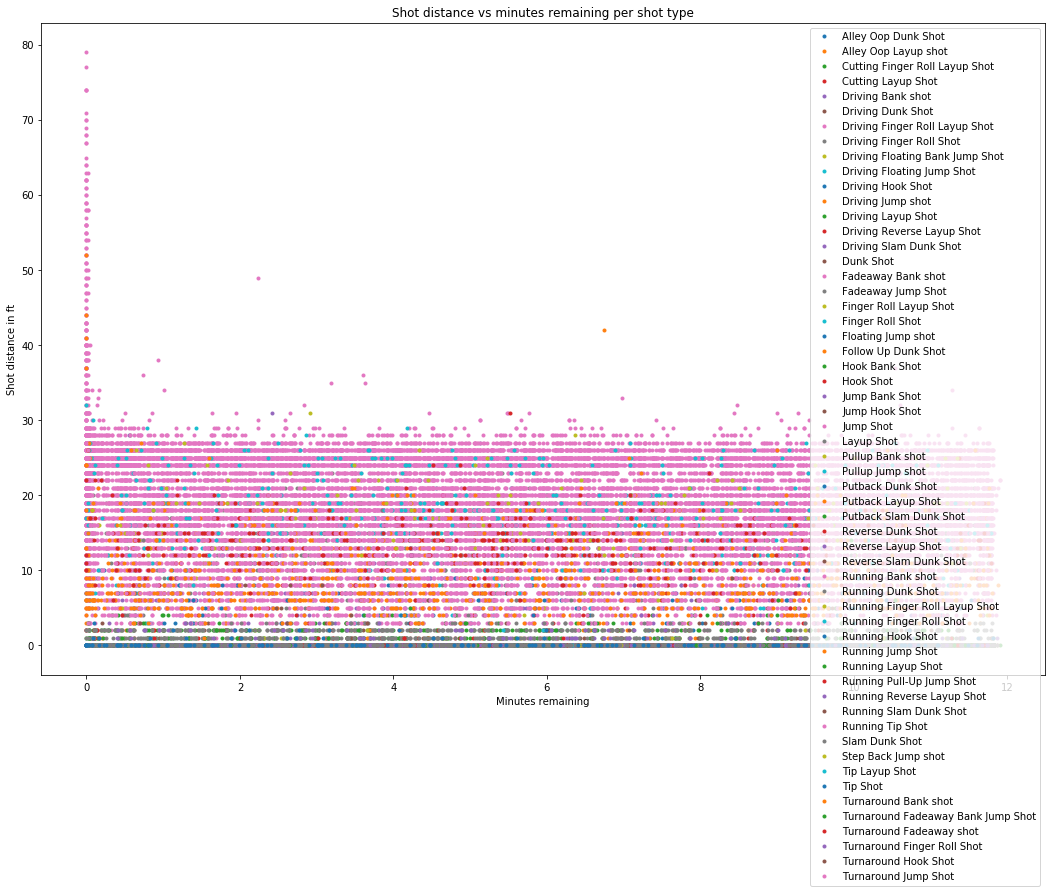

In [108]:
def scatter_shots_over_time(data):
    groups = data.groupby('action_type')

    # Plot
    fig, ax = plt.subplots()
    for name, group in groups:
        ax.plot(group.time_remaining, group.shot_distance, marker='o', linestyle='', ms=3, label=name)
    ax.legend()
    
    # Size
    fig_size = plt.gcf().get_size_inches() #Get current size
    sizefactor = 3 #Set a zoom factor
    
    # Modify the current size by the factor
    plt.gcf().set_size_inches(sizefactor * fig_size) 
    plt.title('Shot distance vs minutes remaining per shot type')
    plt.ylabel('Shot distance in ft')
    plt.xlabel('Minutes remaining')
    plt.savefig('fig.png')
    plt.show()
        
scatter_shots_over_time(data)

In [17]:
data['action_type'].value_counts().head(20)

Jump Shot                     18880
Layup Shot                     2567
Driving Layup Shot             1978
Turnaround Jump Shot           1057
Fadeaway Jump Shot             1048
Running Jump Shot               926
Pullup Jump shot                476
Turnaround Fadeaway shot        439
Slam Dunk Shot                  411
Reverse Layup Shot              395
Jump Bank Shot                  333
Driving Dunk Shot               310
Dunk Shot                       262
Tip Shot                        182
Alley Oop Dunk Shot             122
Step Back Jump shot             118
Floating Jump shot              114
Driving Reverse Layup Shot       97
Hook Shot                        84
Driving Finger Roll Shot         82
Name: action_type, dtype: int64

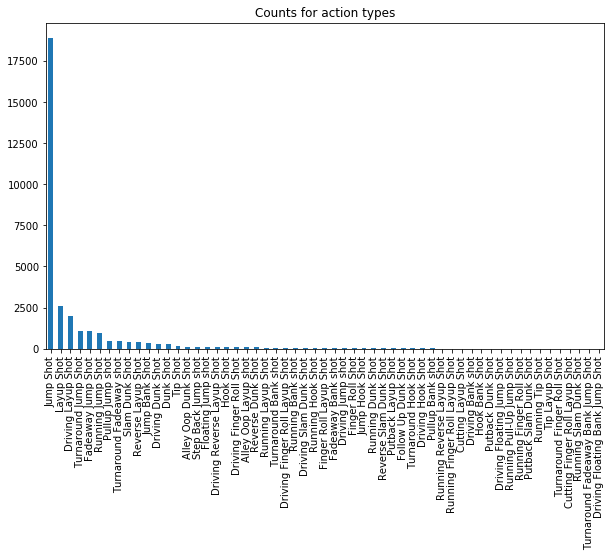

In [15]:
data['action_type'].value_counts().plot(kind='bar',
                                        figsize=[10, 6],
                                        title='Counts for action types')

In [20]:
data['action_type'].unique().size

57

In [19]:
data['action_type'].unique()

array(['Jump Shot', 'Driving Dunk Shot', 'Layup Shot',
       'Running Jump Shot', 'Driving Layup Shot', 'Reverse Layup Shot',
       'Reverse Dunk Shot', 'Slam Dunk Shot', 'Turnaround Jump Shot',
       'Tip Shot', 'Running Hook Shot', 'Alley Oop Dunk Shot',
       'Dunk Shot', 'Alley Oop Layup shot', 'Running Dunk Shot',
       'Driving Finger Roll Shot', 'Running Layup Shot',
       'Finger Roll Shot', 'Fadeaway Jump Shot', 'Follow Up Dunk Shot',
       'Hook Shot', 'Turnaround Hook Shot', 'Running Tip Shot',
       'Jump Hook Shot', 'Running Finger Roll Shot', 'Jump Bank Shot',
       'Turnaround Finger Roll Shot', 'Hook Bank Shot',
       'Driving Hook Shot', 'Running Reverse Layup Shot',
       'Driving Finger Roll Layup Shot', 'Fadeaway Bank shot',
       'Pullup Jump shot', 'Finger Roll Layup Shot',
       'Turnaround Fadeaway shot', 'Driving Reverse Layup Shot',
       'Driving Slam Dunk Shot', 'Step Back Jump shot',
       'Reverse Slam Dunk Shot', 'Turnaround Bank shot',
   